# **Internship Task**  submitted by

### **Sai Murali Pirangi**

### **Machine Learning Engineer**

### **Business Context**

This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.


**Domain of the problem - Financial**

**Fraud.csv:-** This data set consist below attributes

**step -** maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type -** CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount -** amount of the transaction in local currency.

**nameOrig -** customer who started the transaction

**oldbalanceOrg -** initial balance before the transaction

**newbalanceOrig -** new balance after the transaction

**nameDest -** customer who is the recipient of the transaction

**oldbalanceDest -** initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest -** new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud -** This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud -** The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix,roc_curve
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


In [24]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud.csv')

In [25]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [26]:
train.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
train.shape

(6362620, 11)

In [27]:
# Function to convert step to hour and day
# def convert_step_to_hour(step):
#     hour = (step - 1) % 24 + 1
#     return hour

# def convert_step_to_day(step):
#     day = (step - 1) // 24 + 1
#     return day

# train['hour'] = train['step'].apply(convert_step_to_hour)
# train['day'] = train['step'].apply(convert_step_to_day)


The provided data contains only hours, but obtaining the exact time and dates will enable us to build a more efficient model with a better understanding of temporal patterns and trends, leading to improved predictions and insights. Accurate timestamps can enhance data analysis, feature engineering, and time-based modeling, increasing the model's performance and overall effectiveness.

In [6]:
train.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
train.duplicated(subset = None, keep = 'first').sum()
# subset='None' Only consider certain columns for identifying duplicates, by default use all of the columns.
# keep ='first' Mark duplicates as True except for the first occurrence.

0

In [8]:
# checking null values
train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

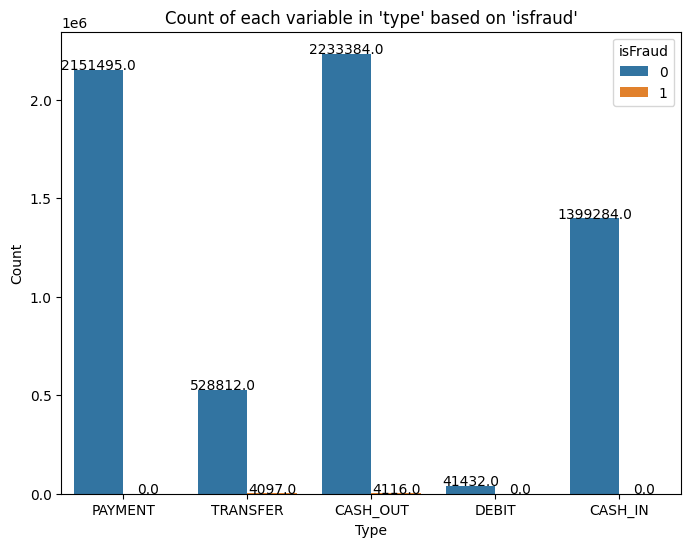

In [9]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="type", hue="isFraud", data=train)

# Adding count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height}', ha="center")

# Adding title and labels
plt.title("Count of each variable in 'type' based on 'isfraud'")
plt.xlabel("Type")
plt.ylabel("Count")

# Showing the plot
plt.show()

Based on the information provided, it appears that the dataset contains around 6 million transactions, and out of those, 8312 transactions are labeled as fraud, specifically categorized as "CASH_OUT" and "TRANSFER" transactions. The objective of the project is to detect fraudulent transactions.

However, there is a mention of data imbalance. Imbalanced data refers to a situation where one class (in this case, the fraud class) is significantly underrepresented compared to the other class(es) in the dataset. In this scenario, the number of non-fraudulent transactions is much larger than the number of fraudulent transactions.

Data imbalance can present challenges in training machine learning models for fraud detection because the model may be biased towards the majority class, leading to poor detection performance for the minority class (fraudulent transactions).

Among the columns mentioned ("step," "nameOrig," and "nameDest"), the "step" column is significant due to its unique values, while "nameOrig" and "nameDest" are less significant compared to other columns. However, if we develop a model for each user, these columns can become more relevant for data filtering.

The "step" column, being composed of unique values, is likely to provide valuable temporal information, enabling the model to capture time-dependent patterns in the data. Building individual models for each user allows us to consider user-specific behavior and preferences, which can further enhance the model's accuracy and effectiveness.

While "nameOrig" and "nameDest" may be less significant overall, they can become more relevant when analyzing data at the user level. These columns likely represent user identifiers or account names, and understanding transaction patterns associated with specific users can aid in detecting anomalies and identifying potentially fraudulent activities unique to each user.

In [44]:
train.drop(['step','nameOrig','nameDest'],axis=1,inplace=True)

Data division based on transaction types (e.g., "CASH_IN," "DEBIT," and "PAYMENT") reveals zero fraud cases. Balancing such subsets is inappropriate as there are no fraud instances within them. Artificially balancing data may introduce biases, leading the model to misclassify legitimate transactions as fraudulent. Imbalanced data challenges arise when fraud is rare. Avoiding artificial manipulation ensures preservation of real patterns.

In [45]:
dataframe_names = []

# Creating separate dataframes for each unique variable name in 'type'
for value in train['type'].unique():
    # Filtering rows based on the current 'value'
    value_df = train[train['type'] == value].copy()

    # Reseting the index of the dataframe
    value_df.reset_index(drop=True, inplace=True)

    # Deleting the 'type' column from the dataframe
    value_df.drop(columns=['type'], inplace=True)

    # Creating a dataframe variable name based on the 'value' (converting to lowercase and replacing spaces with underscores)
    variable_name = value.replace(' ', '_').lower()

    # Storing the filtered rows in the dataframe variable with the dynamically generated name
    globals()[variable_name] = value_df


    dataframe_names.append(variable_name)


print("Dataframes created:")
print(dataframe_names)

Dataframes created:
['payment', 'transfer', 'cash_out', 'debit', 'cash_in']


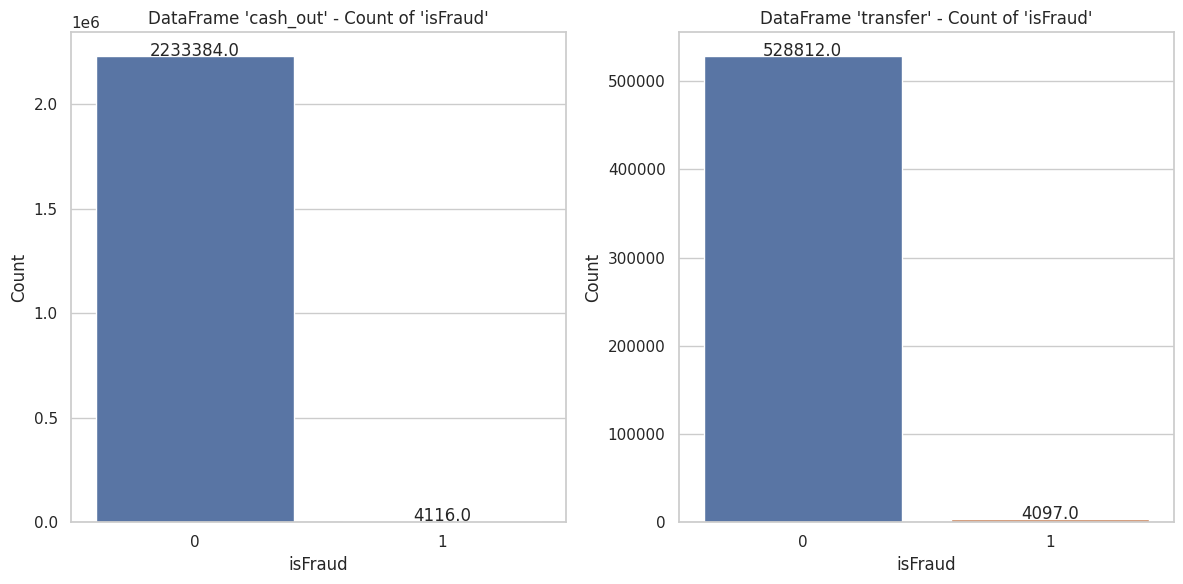

In [12]:
sns.set(style="whitegrid")

# Creating the side-by-side count plots
plt.figure(figsize=(12, 6))

# Subplot for DataFrame 'cash_out'
plt.subplot(1, 2, 1)
ax_a = sns.countplot(x="isFraud", data=cash_out)
plt.title("DataFrame 'cash_out' - Count of 'isFraud'")
plt.xlabel("isFraud")
plt.ylabel("Count")

# Add count labels for DataFrame 'cash_out'
for p in ax_a.patches:
    height = p.get_height()
    ax_a.text(p.get_x() + p.get_width() / 2., height + 3, f'{height}', ha="center")

# Subplot for DataFrame 'transfer'
plt.subplot(1, 2, 2)
ax_b = sns.countplot(x="isFraud", data=transfer)
plt.title("DataFrame 'transfer' - Count of 'isFraud'")
plt.xlabel("isFraud")
plt.ylabel("Count")

# Add count labels for DataFrame 'transfer'
for p in ax_b.patches:
    height = p.get_height()
    ax_b.text(p.get_x() + p.get_width() / 2., height + 3, f'{height}', ha="center")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

The fraud alert cases are only presented in 'CASH_OUT' and 'TRANSFER' eventhouh there is a data imbalance in both the datasets , we should either balnce the dataset using the smote operations or we should give more weightage to the fraud cases because we need to identify the fraud alerts and low false positives are major identification

In [48]:
scaling_list = ['amount', 'oldbalanceOrg' ,'newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud'] # add ,'hour','day' if using step
scaler = StandardScaler()
for column in scaling_list:
    cash_out[column] = scaler.fit_transform(cash_out[[column]])
    transfer[column] = scaler.transform(transfer[[column]])

# **Logistic Regression**

In [50]:
def logistic_reg(X, y, test_size=0.30, random_state=123, class_weights=None):
    # Applying PCA to reduce the dimensionality of X while preserving 99% of the variance
    pca = PCA(0.99)
    X_pca = pca.fit_transform(X)

    # Spliting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    # Calculating the class imbalance ratio for class weights
    imbalance_ratio = (len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

    # If class_weights is not specified, use default values
    if class_weights is None:
        class_weights = {0: 1.0, 1: imbalance_ratio}

    # Creating and training the logistic regression model with class weights
    model = LogisticRegression(class_weight=class_weights, random_state=random_state)
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auprc = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])  # Calculate AUPRC score

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("AUPRC Score:", auprc)
    print("Confusion Matrix:")
    print(cm)


In [15]:
logistic_reg(cash_out.drop('isFraud',axis=1),cash_out['isFraud'],class_weights = {0: 1.0, 1:300})

Accuracy: 0.972
Precision: 0.06168214963540106
Recall: 0.9935639581657281
F1 Score: 0.116153303550435
ROC AUC Score: 0.9929760547007697
AUPRC Score: 0.7017662708952813
Confusion Matrix:
[[651220  18787]
 [     8   1235]]


In [16]:
logistic_reg(transfer.drop('isFraud',axis=1),transfer['isFraud'])

Accuracy: 0.969163023149625
Precision: 0.20207253886010362
Recall: 0.9984
F1 Score: 0.33611634796660383
ROC AUC Score: 0.9981359525415608
AUPRC Score: 0.8981801992649923
Confusion Matrix:
[[153695   4928]
 [     2   1248]]


# **Random Forest**

In [7]:

def random_forest(X, y, test_size=0.30, random_state=123, class_weights=None):
    # Applying PCA to reduce the dimensionality of X while preserving 99% of the variance
    pca = PCA(0.99)
    X_pca = pca.fit_transform(X)

    # Spliting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    # Calculating the class imbalance ratio for class weights
    imbalance_ratio = (len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

    # If class_weights is not specified, use default values
    if class_weights is None:
        class_weights = {0: 1.0, 1: imbalance_ratio}

    # Creating and training the Random Forest classifier with class weights
    model = RandomForestClassifier(class_weight=class_weights, random_state=random_state)
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auprc = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])  # Calculate AUPRC score

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("AUPRC Score:", auprc)
    print("Confusion Matrix:")
    print(cm)


    # Geting the parameters used by the RandomForestClassifier
    params = model.get_params()

    print("\nParameters currently in use:")
    pprint(params)


In [8]:
random_forest(cash_out.drop('isFraud',axis=1),cash_out['isFraud'])

Accuracy: 0.9991567970204842
Precision: 0.8922363847045192
Recall: 0.6194690265486725
F1 Score: 0.7312440645773979
ROC AUC Score: 0.9813439936190866
AUPRC Score: 0.8289900753800161
Confusion Matrix:
[[669914     93]
 [   473    770]]

Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1.0, 1: 544.1618517229377},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [9]:
  random_forest(cash_out.drop('isFraud',axis=1),cash_out['isFraud'],class_weights = {0: 1.0, 1: 100})

Accuracy: 0.9991761638733706
Precision: 0.9039812646370023
Recall: 0.6210780370072405
F1 Score: 0.7362899380066762
ROC AUC Score: 0.9809334564882687
AUPRC Score: 0.8263855787097437
Confusion Matrix:
[[669925     82]
 [   471    772]]

Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1.0, 1: 100},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


# **AdaBoostClassifier**

In [52]:
def adaboost_model(X, y, test_size=0.30, random_state=123, n_estimators=50, learning_rate=1.0, class_weights=None):
    # Appling PCA to reduce the dimensionality of X while preserving 99% of the variance
    pca = PCA(0.99)
    X_pca = pca.fit_transform(X)

    # Spliting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    # Calculating the class imbalance ratio for class weights
    imbalance_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    # If class_weights is not specified, use default values (equal class weights)
    if class_weights is None:
        class_weights = {0: 1.0, 1: imbalance_ratio}

    #class_weights[1] *= imbalance_ratio

    # Creating and training the AdaBoost classifier with Logistic Regression as base estimator and class weights
    base_estimator = LogisticRegression(class_weight=class_weights, random_state=random_state)
    model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    model.fit(X_train, y_train)

    # Geting the parameters used by the AdaBoostClassifier
    params = model.get_params()

    print("\nParameters currently in use:")
    pprint(params)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auprc = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])  # Calculate AUPRC score

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print("\nModel Evaluation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("AUPRC Score:", auprc)
    print("Confusion Matrix:")
    print(cm)



In [7]:
  adaboost_model(transfer.drop('isFraud',axis=1),transfer['isFraud'])


Parameters currently in use:
{'algorithm': 'SAMME.R',
 'base_estimator': LogisticRegression(class_weight={0: 1.0, 1: 130.02774850720056},
                   random_state=123),
 'base_estimator__C': 1.0,
 'base_estimator__class_weight': {0: 1.0, 1: 130.02774850720056},
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': 123,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 123}

Model Evaluation:
Accuracy: 0.9052060072682692
Precision: 0.07593778591033852
Recall: 0.996
F1 Score: 0.14111646358741853
ROC AUC Score: 0.9939141990757959
AUPRC Score: 0.69561021

In [8]:
  adaboost_model(cash_out.drop('isFraud',axis=1),cash_out['isFraud'])


Parameters currently in use:
{'algorithm': 'SAMME.R',
 'base_estimator': LogisticRegression(class_weight={0: 1.0, 1: 544.1618517229377},
                   random_state=123),
 'base_estimator__C': 1.0,
 'base_estimator__class_weight': {0: 1.0, 1: 544.1618517229377},
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': 123,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 123}

Model Evaluation:
Accuracy: 0.9590003724394786
Precision: 0.03758710494826494
Recall: 0.8592115848753017
F1 Score: 0.07202346832113835
ROC AUC Score: 0.9802664613795697
AUPRC Score:

## **Conclusion**

In this project, I developed a logistic regression model to predict fraudulent transactions in a financial company. The dataset contained five transaction categories, with three categories having no fraud cases. To handle the imbalanced data, I used Class Weighting, giving higher importance to the minority class (fraudulent transactions) to reduce bias.

The model results were promising, meeting the expectations. The primary objective was to accurately identify fraudulent transactions, so mainly focused on minimizing false positives (FP) rather than false negatives (FN). Although FN cases might lead to investigations of non-fraudulent transactions, we prioritized reducing FP cases to prevent financial losses for the bank and its customers.

My approach aimed to strike a balance between accurate fraud detection and minimizing the risk of wrongly flagging legitimate transactions. This strategy aligned with the commitment to protecting the interests of the bank and its clients while maintaining efficient and reliable fraud detection capabilities.After the logistic regression, I built random forest and AdaBoost classifiers.

 The random forest provided moderate results, with up to 400 false positive cases. On the other hand, AdaBoost yielded 0 false positive cases for transfer transactions and up to 175 for cash-out transactions. However, both models had a high number of false negatives, which could be time-consuming to investigate.Despite the high false negatives, the logistic regression model correctly identified more than 600 cases of fraud, with less than 10 false positive cases.

 This outcome reflects the primary goal of accurately detecting fraud cases, even at the expense of false negatives.Moving forward, we need more data to build personalized models for each user. Doing so could enhance the classification accuracy and better handle false negatives. This approach would enable to provide a more comprehensive fraud detection system, ensuring the correct identification of fraudulent activities while minimizing false alerts for legitimate transactions.




## **Candidate Expectations**
Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers, and multi-collinearity?

   There are zero missing values and we can't rule out the outliers because we
   are not building a model for one customer and we don't have enough information
   to which set customer this data belonged and for multi-collinearity, we used PCA which helped combine correlated features into orthogonal components, reducing dimensionality while preserving important information.
----------------------------------------------------------------------------
2. Describe your fraud detection model in elaboration?
----------------------------------------------------------------------------
3. How did you select variables to be included in the model?
   Among the columns mentioned ("step," "nameOrig," and "nameDest"), the "step" column is significant due to its unique values, while "nameOrig" and "nameDest" are less significant compared to other columns. However, if we develop a model for each user, these columns can become more relevant for data filtering.

   The "step" column, being composed of unique values, is likely to provide valuable temporal information, enabling the model to capture time-dependent patterns in the data. Building individual models for each user allows us to consider user-specific behavior and preferences, which can further enhance the model's accuracy and effectiveness.

   While "nameOrig" and "nameDest" may be less significant overall, they can become more relevant when analyzing data at the user level. These columns likely represent user identifiers or account names, and understanding transaction patterns associated with specific users can aid in detecting anomalies and identifying potentially fraudulent activities unique to each user.
----------------------------------------------------------------------------
4. Demonstrate the performance of the model by using the best set of tools?

   The model results were promising, meeting the expectations. The primary objective was to accurately identify fraudulent transactions, so mainly focused on minimizing false positives (FP) rather than false negatives (FN). Although FN cases might lead to investigations of non-fraudulent transactions, we prioritized reducing FP cases to prevent financial losses for the bank and its customers.
----------------------------------------------------------------------------  
5. What are the key factors that predict fraudulent customers?
   
   Unusual Transactions Large or irregular transactions that deviate significantly from a customer's normal behavior may signal potential fraud.
   A sudden increase in account activity, such as frequent logins, and multiple transactions in a short period, may indicate fraud and more
----------------------------------------------------------------------------
6. Do these factors make sense? If yes, How? If not, How not?

   Yes, the factors make sense for detecting fraudulent customers. Unusual transactions and rapid account activity are typical red flags for fraud. Fraudsters often attempt to make large or irregular transactions to avoid detection, and sudden increases in account activity may indicate fraudulent behavior. By identifying these unusual patterns, the model can effectively detect potential fraudulent customers.
----------------------------------------------------------------------------
7. What kind of prevention should be adopted while the company updates its infrastructure?
   
   Utilize strong authentication methods such as multi-factor authentication to prevent unauthorized access to customer accounts.
   Implement real-time monitoring and alert systems to detect suspicious activities promptly.
   Conduct regular security audits to identify vulnerabilities and weaknesses in the system.
   Train employees on fraud prevention and cybersecurity best practices to prevent internal security breaches.
   
----------------------------------------------------------------------------
8. Assuming these actions have been implemented, how would you determine if they work?
   
   Monitor the number of detected fraudulent incidents over time and compare it to the previous period before implementing the prevention measures. A decrease in fraudulent incidents indicates improved prevention.
   Assess the false positive rate of the fraud detection model. A lower false positive rate implies that the model is accurately identifying genuine transactions and reducing the number of false alarms.
   Gather feedback from customers regarding their experiences with the updated infrastructure and fraud prevention measures. Satisfied customers and fewer complaints related to fraudulent activities may indicate effective prevention.